In [1]:
#Installing necessary libraries and upgrading versions - 
#pip install requests
#pip install --upgrade pip

In [2]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

C:\Users\SATHAKI PROSAD\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.14) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
#Getting the content from HTML-page and starting to parse the HTML-page:
url = "https://www.imdb.com/search/title/?genres=action&sort=user_rating,desc&ti
response = requests.get(url)
# print(response)
soup = BeautifulSoup(response.content, 'html.parser')
# print(soup)

In [ ]:
#Creating an empty list, so that we can append the values -
# CSv - 1:
Sno = []
movie_name = []
director_name = []
duration = []
year = []
rating = []
metascore = []
#CSV - 2:
Stars = []
votes = []
genre = []
gross = []
popularity = []
certifcation = []

In [ ]:
#Storing the meaningfull required data in the variable
movie_data = soup.findAll('div', attrs= {'class': "lister-item mode-advanced"})
# <div class=>
# movie_name

In [ ]:
#Calling molvie-name one-by-one using for loop and storing it in movie-name list
#For data-set -1 ->
for store in movie_data:
 name = store.h3.a.text
 movie_name.append(name) 
 
 serial = store.h3.find('span', class_ = "lister-item-index unbold text-prima
 #print(serial)
 Sno.append(serial)
 runtime = store.p.find('span', class_ = 'runtime').text.replace(' min', '')
 duration.append(runtime) 
 
 #Scraping Director name -
 cast = store.find("p", class_ = '')
 cast = cast.text.replace('\n', '').split('|')
 cast = [x.strip() for x in cast]
 cast = [cast[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])
 director_name.append(cast[0])
 
 year_of_release = store.h3.find('span', class_ = "lister-item-year text-mute
 #print(year_of_release)
 year.append(year_of_release)
 
 rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.r
 rating.append(rate)
 
 meta = store.find('span', class_ = 'metascore').text.replace(' ', '') if st
 metascore.append(meta)
 
#For data-set -2 ->
 #Cast Details -- Stars
 cast = store.find("p", class_ = '')
 cast = cast.text.replace('\n', '').split('|')
 cast = [x.strip() for x in cast]
 cast = [cast[i].replace(j, "") for i,j in enumerate(["Director:", "Stars:"])
 Stars.append([x.strip() for x in cast[1].split(",")]) 
 
 #Since, gross and votes have same attributes, that's why we had created a co
 value = store.find_all('span', attrs = {'name': 'nv'}) 
 vote = value[0].text
 votes.append(vote)
 
 genre_list = store.p.find('span', class_ = "genre")
 #print("I am genre_list", genre_list)
 genre.append(genre_list)
 grosses = value[1].text if len(value) >1 else '*****'
 gross.append(grosses)
 
 #Popularity --
 rate = store.find('div', class_ = 'inline-block ratings-imdb-rating').text.r
 popularity.append(rate)
 
 #Description of the Movies -- Not explained in the Video, But you will figur
 #describe = store.find_all('p', class_ = 'text-muted')
 #description_ = describe[1].text.replace('\n', '') if len(describe) >1 else 
 #description.append(description_)
#Certifcation --
 certificate_list = store.p.find('span', class_ = "certificate")
 #print("I am certificate_list", certificate_list)
 certifcation.append(certificate_list)

In [ ]:
#Count the number of movies -
# np.count_nonzero(movie_name)
# sorted(year)
# sorted(Sno)
# sorted(rating)

In [ ]:
#Creating a dataframe-1 using pandas library -
movie_df_1 = pd.DataFrame({'Serial Number': Sno, 'Name of movie': movie_name, "D
movie_df_

In [1]:
import pandas as pd
import numpy as np

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
cd C:\Users\SATHAKI PROSAD\Desktop

C:\Users\SATHAKI PROSAD\Desktop


In [32]:
mov = pd.read_csv('movie_data.csv')

In [33]:
mov

,Sno,Movie_name,Director1,Director2,Director3,Director4,Director5,Director6,Duration,Year,...,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross_collection,Certification
0,1,The Dark Knight,Christopher Nolan,NaN,NaN,NaN,NaN,NaN,152,2008,...,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2755530,Action,Crime,Drama,9.0,UA
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,NaN,NaN,NaN,NaN,201,2003,...,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1904771,Action,Adventure,Drama,9.0,U
2,3,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,Kemp Powers,Justin K. Thompson,NaN,NaN,NaN,140,2023,...,Shameik Moore,Hailee Steinfeld,Brian Tyree Henry,Luna Lauren Velez,199159,Animation,Action,Adventure,8.9,U
3,4,Inception,Christopher Nolan,NaN,NaN,NaN,NaN,NaN,148,2010,...,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2446208,Action,Adventure,Sci-Fi,8.8,UA
4,5,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,NaN,NaN,NaN,NaN,178,2001,...,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1933012,Action,Adventure,Drama,8.8,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,17+7+1,Radhe,Prabhu Deva,NaN,NaN,NaN,NaN,NaN,109,2021,...,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,179092,Action,Crime,Thriller,1.9,UA
1771,17+7+2,Race 3,Remo D'Souza,NaN,NaN,NaN,NaN,NaN,160,2018,...,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,47862,Action,Crime,Thriller,1.9,UA
1772,17+7+3,Angels Apocalypse,Sean Cain,Enzo Zelocchi,NaN,NaN,NaN,NaN,85,2015,...,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,42920,Action,Fantasy,Sci-Fi,1.6,NaN
1773,17+7+4,Elk*rtuk,Keith English,NaN,NaN,NaN,NaN,NaN,125,2021,...,Vivianne Bánovits,András Mózes,Barna Bokor,Gabriella Gubás,39615,Action,Crime,Drama,1.5,NaN


In [23]:
mov.dtypes

Sno                   int64
Movie_name           object
Director1            object
Director2            object
Director3            object
Director4            object
Director5            object
Director6            object
Duration             object
Year                  int64
Ratings             float64
Metascore           float64
Star1                object
Star2                object
Star3                object
Star4                object
Votes                 int64
Genre1               object
Genre2               object
Genre3               object
Gross_collection    float64
Certification        object
dtype: object

In [24]:
mov.columns

Index(['Sno', 'Movie_name', 'Director1', 'Director2', 'Director3', 'Director4',
       'Director5', 'Director6', 'Duration', 'Year', 'Ratings', 'Metascore',
       'Star1', 'Star2', 'Star3', 'Star4', 'Votes', 'Genre1', 'Genre2',
       'Genre3', 'Gross_collection', 'Certification'],
      dtype='object')

In [34]:
mov.isnull().sum()

Sno                    0
Movie_name             0
Director1              0
Director2           1660
Director3           1762
Director4           1769
Director5           1771
Director6           1774
Duration               0
Year                   0
Ratings                0
Metascore              0
Star1                  0
Star2                  1
Star3                  1
Star4                  2
Votes                  0
Genre1                 0
Genre2                 1
Genre3               148
Gross_collection       0
Certification         75
dtype: int64

In [55]:
#replacing all nan values with zero
m=mov.replace(np. nan,0)

In [27]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sno               1775 non-null   int64  
 1   Movie_name        1775 non-null   object 
 2   Director1         1775 non-null   object 
 3   Director2         115 non-null    object 
 4   Director3         13 non-null     object 
 5   Director4         6 non-null      object 
 6   Director5         4 non-null      object 
 7   Director6         1 non-null      object 
 8   Duration          1775 non-null   object 
 9   Year              1775 non-null   int64  
 10  Ratings           1775 non-null   float64
 11  Metascore         1586 non-null   float64
 12  Star1             1775 non-null   object 
 13  Star2             1774 non-null   object 
 14  Star3             1774 non-null   object 
 15  Star4             1773 non-null   object 
 16  Votes             1775 non-null   int64  


Michael Bay         15
Tony Scott          13
Steven Spielberg    13
Robert Rodriguez    13
Antoine Fuqua       12
                    ..
Andrew Stanton       1
Anne Fletcher        1
Doug Lefler          1
Peter Atencio        1
Makoto Kamiya        1
Name: Director1, Length: 943, dtype: int64


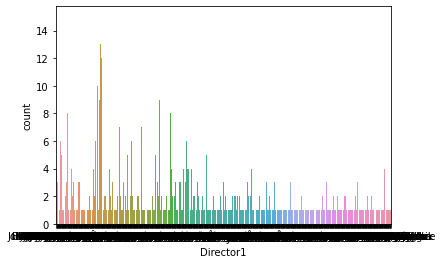

In [33]:
sns.countplot(x="Director1",data=mov)
print(mov["Director1"].value_counts())
#most of the movies done by Micheal Bay

UA           599
A            405
U            257
R            210
PG-13         78
18            37
16            25
Not Rated     18
PG            16
13            15
UA 16+        10
15+            7
UA 13+         7
7              4
12+            3
All            2
(Banned)       2
U/A 16+        1
16+            1
UA 7+          1
12             1
U/A            1
Name: Certification, dtype: int64


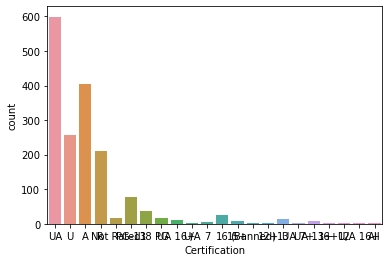

In [34]:
sns.countplot(x="Certification",data=mov)
print(mov["Certification"].value_counts())
#mos of the movies are UA certified

Action       1704
Animation      71
Name: Genre1, dtype: int64


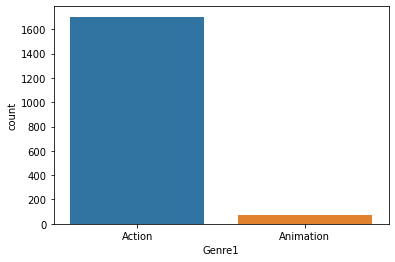

In [35]:
sns.countplot(x="Genre1",data=mov)
print(mov["Genre1"].value_counts())

Adventure    643
Crime        348
Comedy       234
Drama        210
Action        71
Thriller      68
Sci-Fi        59
Horror        49
Biography     41
Fantasy       23
Mystery       23
War            2
History        1
Family         1
Sport          1
Name: Genre2, dtype: int64


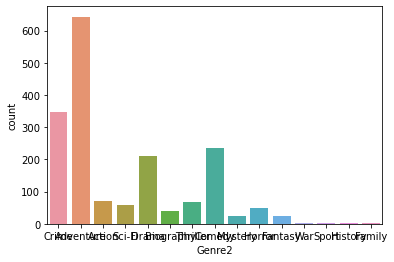

In [36]:
sns.countplot(x="Genre2",data=mov)
print(mov["Genre2"].value_counts())

Drama        336
Thriller     312
Sci-Fi       227
Crime        172
Comedy       140
Fantasy      123
Horror        62
Adventure     61
History       41
Mystery       41
Romance       33
Family        22
War           20
Sport         16
Biography     11
Western        8
Musical        1
Music          1
Name: Genre3, dtype: int64


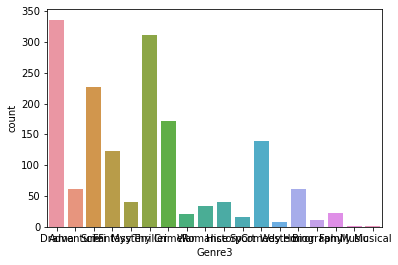

In [37]:
sns.countplot(x="Genre3",data=mov)
print(mov["Genre3"].value_counts())

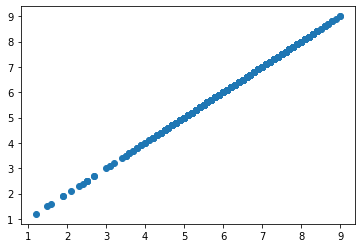

In [30]:
x=mov["Ratings"]
y=mov["Gross_collection"]
plt.scatter(x,y)
plt.show()
#so as ratings increases gross collections also increases

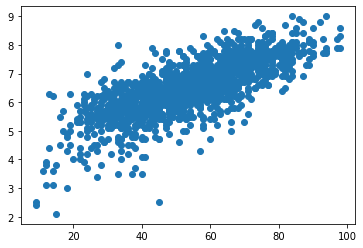

In [31]:
x=mov["Metascore"]
y=mov["Gross_collection"]
plt.scatter(x,y)
plt.show()
# Higher the metascore more is the gross collection

C:\Users\SATHAKI PROSAD\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gross_collection'>

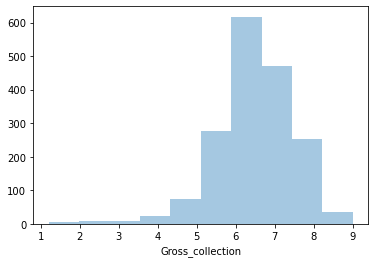

In [38]:
sns.distplot(mov["Gross_collection"],bins=10,kde=False)

<AxesSubplot:xlabel='Votes'>

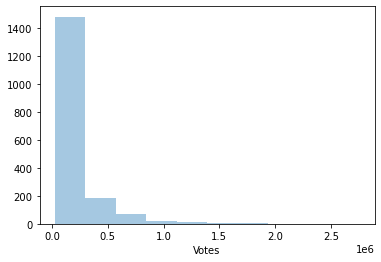

In [39]:
sns.distplot(mov["Votes"],bins=10,kde=False)

C:\Users\SATHAKI PROSAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


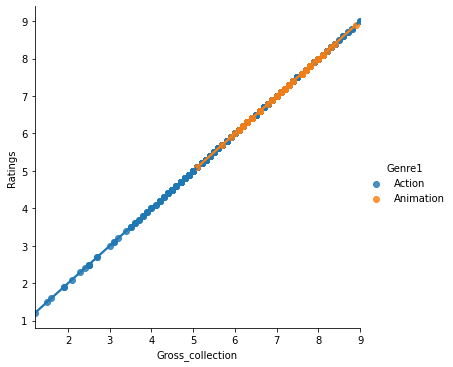

In [40]:
sns.lmplot("Gross_collection","Ratings",data=mov,hue="Genre1")
# most of the animated movie got high ratings as well as has high gross collection
# but action movies have both high and low collections as well as ratings

C:\Users\SATHAKI PROSAD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


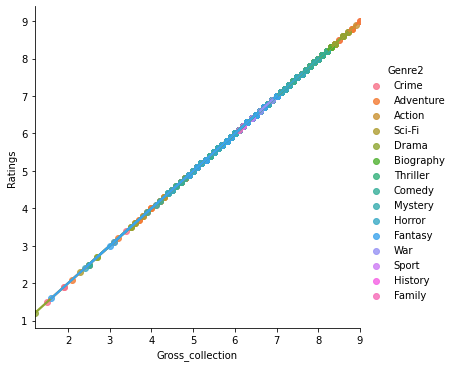

In [41]:
sns.lmplot("Gross_collection","Ratings",data=mov,hue="Genre2")
# crime and adventure movie has high ratings and high gross collections

In [35]:
mov.drop(["Sno","Director2","Director3","Director4","Director5","Director6","Star2","Star3","Star4","Genre2","Genre3","Certification"],axis=1,inplace=True)

In [36]:
mov #taking onle lead directors,star and genre

,Movie_name,Director1,Duration,Year,Ratings,Metascore,Star1,Votes,Genre1,Gross_collection
0,The Dark Knight,Christopher Nolan,152,2008,9.0,84,Christian Bale,2755530,Action,9.0
1,The Lord of the Rings: The Return of the King,Peter Jackson,201,2003,9.0,94,Elijah Wood,1904771,Action,9.0
2,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140,2023,8.9,86,Shameik Moore,199159,Animation,8.9
3,Inception,Christopher Nolan,148,2010,8.8,74,Leonardo DiCaprio,2446208,Action,8.8
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178,2001,8.8,92,Elijah Wood,1933012,Action,8.8
...,...,...,...,...,...,...,...,...,...,...
1770,Radhe,Prabhu Deva,109,2021,1.9,60,Salman Khan,179092,Action,1.9
1771,Race 3,Remo D'Souza,160,2018,1.9,60,Anil Kapoor,47862,Action,1.9
1772,Angels Apocalypse,Sean Cain,85,2015,1.6,60,Enzo Zelocchi,42920,Action,1.6
1773,Elk*rtuk,Keith English,125,2021,1.5,60,Vivianne Bánovits,39615,Action,1.5


In [37]:
mov.dropna()

,Movie_name,Director1,Duration,Year,Ratings,Metascore,Star1,Votes,Genre1,Gross_collection
0,The Dark Knight,Christopher Nolan,152,2008,9.0,84,Christian Bale,2755530,Action,9.0
1,The Lord of the Rings: The Return of the King,Peter Jackson,201,2003,9.0,94,Elijah Wood,1904771,Action,9.0
2,Spider-Man: Across the Spider-Verse,Joaquim Dos Santos,140,2023,8.9,86,Shameik Moore,199159,Animation,8.9
3,Inception,Christopher Nolan,148,2010,8.8,74,Leonardo DiCaprio,2446208,Action,8.8
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178,2001,8.8,92,Elijah Wood,1933012,Action,8.8
...,...,...,...,...,...,...,...,...,...,...
1770,Radhe,Prabhu Deva,109,2021,1.9,60,Salman Khan,179092,Action,1.9
1771,Race 3,Remo D'Souza,160,2018,1.9,60,Anil Kapoor,47862,Action,1.9
1772,Angels Apocalypse,Sean Cain,85,2015,1.6,60,Enzo Zelocchi,42920,Action,1.6
1773,Elk*rtuk,Keith English,125,2021,1.5,60,Vivianne Bánovits,39615,Action,1.5


In [38]:
#dropped all nan values

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
lb=LabelEncoder()

In [41]:
mov["Director1"]=lb.fit_transform(mov["Director1"])

In [42]:
mov["Star1"]=lb.fit_transform(mov["Star1"])

In [43]:
mov["Genre1"]=lb.fit_transform(mov["Genre1"])

In [44]:
mov.skew()# skewness range is between -0.5 to +0.5

Director1          -0.092524
Duration            1.483472
Year               -1.488027
Ratings            -0.800099
Metascore          -0.071639
Star1               0.034590
Votes               3.832176
Genre1              4.698827
Gross_collection   -0.800099
dtype: float64

In [45]:
mov.drop(["Year"],axis=1,inplace=True)

In [46]:
mov.drop(["Movie_name"],axis=1,inplace=True)

In [47]:
#votes is skewed so it should be removed
mov["Votes"]=np.cbrt(mov["Votes"])

In [48]:
mov.dtypes

Director1             int32
Duration              int64
Ratings             float64
Metascore             int64
Star1                 int32
Votes               float64
Genre1                int32
Gross_collection    float64
dtype: object

In [49]:
mov.describe()

,Director1,Duration,Ratings,Metascore,Star1,Votes,Genre1,Gross_collection
count,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000,1775.000000
mean,491.479437,115.399437,6.478254,54.080000,366.247887,50.214659,0.040000,6.478254
std,268.143256,21.737672,0.999171,15.506602,213.321963,17.791800,0.196014,0.999171
min,0.000000,45.000000,1.200000,9.000000,0.000000,29.240957,0.000000,1.200000
25%,268.500000,100.000000,5.900000,43.000000,176.000000,36.208535,0.000000,5.900000
50%,499.000000,112.000000,6.500000,56.000000,357.000000,45.847796,0.000000,6.500000
75%,727.000000,127.000000,7.100000,64.000000,566.000000,59.592704,0.000000,7.100000
max,942.000000,321.000000,9.000000,98.000000,735.000000,140.195814,1.000000,9.000000


In [50]:
# SD is less than mean so there is less outliers.

In [51]:
#lets check correlation

In [52]:
cor=mov.corr()
cor #no multicollinearity found

,Director1,Duration,Ratings,Metascore,Star1,Votes,Genre1,Gross_collection
Director1,1.000000,0.016038,-0.023437,-0.035500,-0.003897,-0.031717,-0.029966,-0.023437
Duration,0.016038,1.000000,0.341822,0.298362,0.040288,0.271563,-0.150732,0.341822
Ratings,-0.023437,0.341822,1.000000,0.649565,0.036972,0.425447,0.131660,1.000000
Metascore,-0.035500,0.298362,0.649565,1.000000,0.017111,0.314089,0.128766,0.649565
Star1,-0.003897,0.040288,0.036972,0.017111,1.000000,-0.016461,0.001340,0.036972
Votes,-0.031717,0.271563,0.425447,0.314089,-0.016461,1.000000,-0.028415,0.425447
Genre1,-0.029966,-0.150732,0.131660,0.128766,0.001340,-0.028415,1.000000,0.131660
Gross_collection,-0.023437,0.341822,1.000000,0.649565,0.036972,0.425447,0.131660,1.000000


In [53]:
#Creating the model

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [55]:
x = mov.drop('Gross_collection', axis=1).copy()
x

,Director1,Duration,Ratings,Metascore,Star1,Votes,Genre1
0,148,152,9.0,84,121,140.195814,0
1,679,201,9.0,94,188,123.959816,0
2,406,140,8.9,86,622,58.398270,1
3,148,148,8.8,74,420,134.740388,0
4,679,178,8.8,92,188,124.569441,0
...,...,...,...,...,...,...,...
1770,698,109,1.9,60,591,56.367062,0
1771,720,160,1.9,60,43,36.307550,0
1772,802,85,1.6,60,196,35.012241,0
1773,493,125,1.5,60,708,34.089442,0


In [56]:
y = mov['Gross_collection'].copy()
y

0       9.0
1       9.0
2       8.9
3       8.8
4       8.8
       ... 
1770    1.9
1771    1.9
1772    1.6
1773    1.5
1774    1.2
Name: Gross_collection, Length: 1775, dtype: float64

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [58]:
lm=LinearRegression()

In [59]:
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
lm.coef_

array([-3.62057208e-18, -5.53069632e-18,  1.00000000e+00, -1.41279082e-16,
       -1.79559711e-16,  3.13375601e-17, -6.06860476e-16])

In [61]:
lm.intercept_

6.750155989720952e-14

In [62]:
lm.score(x_train,y_train) # this model is 100% accurate

1.0

In [63]:
pred=lm.predict(x_test)
print("predicted result",pred)
print("Actual result",y_test)

predicted result [8.1 6.2 6.3 7.3 7.  6.3 6.6 7.4 7.1 7.3 6.2 6.2 4.8 5.4 5.3 5.5 7.9 6.5
 6.3 6.5 7.3 3.5 4.7 6.  7.3 6.  6.2 7.2 6.2 6.2 6.9 6.6 6.8 5.8 7.5 6.4
 7.9 5.7 6.6 8.3 7.6 6.9 7.2 6.7 6.1 7.  7.3 6.9 6.1 7.3 6.  8.1 6.2 7.5
 6.5 7.8 7.8 6.5 7.4 7.  5.7 6.8 6.1 6.3 6.9 5.2 8.4 7.  6.  6.1 7.5 6.
 5.5 6.2 7.9 6.8 5.7 6.6 7.  6.9 5.8 6.9 7.6 6.  4.5 7.2 7.3 6.3 4.5 7.6
 6.3 6.9 7.  7.2 6.2 7.6 7.  7.1 5.2 6.9 6.7 6.2 7.6 7.6 6.9 6.4 6.5 4.7
 5.1 6.4 6.6 7.1 7.1 7.  6.9 6.2 7.2 7.7 6.1 7.6 5.1 2.7 7.1 6.5 7.3 7.4
 7.2 5.3 7.6 7.3 8.2 6.2 6.9 5.5 6.  5.9 6.  7.1 4.  7.1 8.1 6.6 4.5 8.1
 8.1 7.1 7.  6.7 7.2 7.2 6.8 6.7 5.2 7.3 5.9 8.1 2.7 7.7 3.6 6.1 6.1 6.8
 5.7 6.5 5.  6.8 8.3 6.2 6.2 5.3 4.7 6.3 5.7 8.  6.4 7.2 6.3 6.2 6.2 7.7
 6.1 7.2 7.  6.7 4.7 6.4 6.7 7.  6.4 8.3 6.2 6.7 6.1 5.9 6.5 6.2 7.7 6.5
 5.  6.5 8.2 6.7 6.1 7.1 7.7 6.3 6.4 6.4 8.1 6.1 6.9 5.7 6.6 6.2 4.5 6.1
 5.7 5.6 7.9 7.5 7.4 6.6 4.6 7.3 5.8 5.3 5.6 6.7 7.  5.9 5.8 5.8 5.4 6.1
 5.5 5.6 6.  6.4 6.3 5.6 6.2 6.5 7.

In [64]:
print("Error")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

Error
Mean Absolute Error: 3.340542351805532e-14
Mean Squared Error: 1.4623014142419716e-27
Root Mean Squared Error: 3.8240049872378197e-14


In [66]:
GC=pd.DataFrame(pred)
mov.to_csv("Grosscollectionprediction.csv")
#saving the predicted value

In [67]:
x = mov.drop('Votes', axis=1).copy()
x

,Director1,Duration,Ratings,Metascore,Star1,Genre1,Gross_collection
0,148,152,9.0,84,121,0,9.0
1,679,201,9.0,94,188,0,9.0
2,406,140,8.9,86,622,1,8.9
3,148,148,8.8,74,420,0,8.8
4,679,178,8.8,92,188,0,8.8
...,...,...,...,...,...,...,...
1770,698,109,1.9,60,591,0,1.9
1771,720,160,1.9,60,43,0,1.9
1772,802,85,1.6,60,196,0,1.6
1773,493,125,1.5,60,708,0,1.5


In [68]:
y = mov['Votes'].copy()
y

0       140.195814
1       123.959816
2        58.398270
3       134.740388
4       124.569441
           ...    
1770     56.367062
1771     36.307550
1772     35.012241
1773     34.089442
1774     45.847796
Name: Votes, Length: 1775, dtype: float64

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [70]:
lm=LinearRegression()

In [71]:
lm.fit(x_train,y_train)

LinearRegression()

In [72]:
lm.coef_

array([-2.97624812e-03,  1.20503152e-01,  3.44188041e+00,  7.38482531e-02,
       -2.83519065e-03, -6.91141694e+00,  3.44188041e+00])

In [73]:
lm.intercept_

-9.161905014899702

In [74]:
lm.score(x_train,y_train) # this model is not accurate

0.23899547416242206

In [ ]:
# lets try regualarisation to improve the model

In [75]:
from sklearn.linear_model import Lasso

In [76]:
ls=Lasso(alpha=.0001)

In [78]:
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))
predlasso=ls.predict(x_test)
print(mean_squared_error(y_test,predlasso))

0.23899547333137316
233.0889513188631


C:\Users\SATHAKI PROSAD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147283.96924254956, tolerance: 42.51385938312799
  model = cd_fast.enet_coordinate_descent(


In [79]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

-7.146638565274856


In [ ]:
#Voting model is not fitting